In [58]:
import pandas as pd
import numpy as np
import datetime 
from datetime import date
from datetime import timedelta
import matplotlib as mpl  
import matplotlib.pyplot as plt

In [86]:
#importing excel file and removing rows with null values
df = pd.read_excel(r'./Documents/po_history_12.xlsx', sheet_name='Raw Data')
df = df[['VIM_NOUN', 'LUM_QTY', 'PO_DT']]
df['PO_DT'] = pd.to_datetime(df['PO_DT'])  
mask = (df['PO_DT'] >= '2019-3-1') & (df['PO_DT'] <= '2019-6-05')
df = df.loc[mask]

new_df = pd.read_excel(r'./Documents/PO_Tracker_060920.xlsx', sheet_name='PO Tracker')
new_df = new_df.dropna(axis=0, subset=['Date Ordered'])
new_df = new_df[['Product Category', 'QTY Ordered in EA','Date Ordered']]
mask = (new_df['Date Ordered'] >= '2020-3-1')
new_df = new_df.loc[mask]

In [87]:
#calculating total ordered for each category
total_ordered_history = df.groupby(['VIM_NOUN'])['LUM_QTY'].sum()
total_ordered_new = new_df.groupby(['Product Category'])['QTY Ordered in EA'].sum().reset_index()

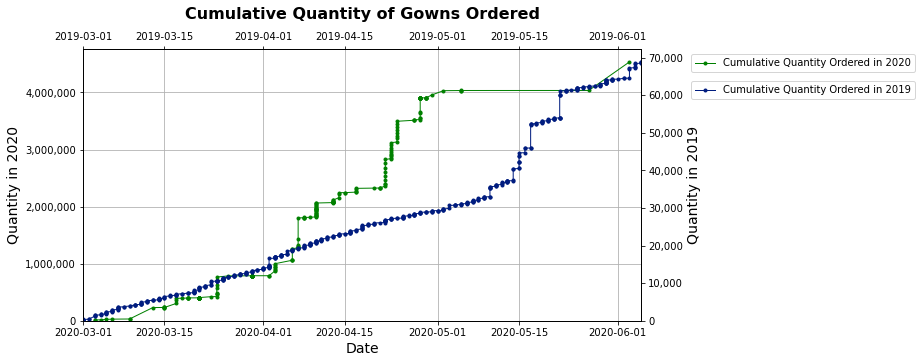

In [88]:
category_df = df.loc[df['VIM_NOUN'] == 'GOWN'].copy()
category_df_new = new_df[new_df['Product Category'].str.contains('Gown')].copy()

#settings for plot
plt.style.use('seaborn-dark-palette')
fig,ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
ax2 = ax.twiny()
ax3 = ax2.twinx()

#plotting cumulative percent ordered
category_df = category_df.sort_values(by=['PO_DT'])
result, temp = [], 0
for value in category_df['LUM_QTY']:
    temp += value
    result.append(temp)
category_df['Cumulative Ordered'] = result

category_df_new = category_df_new.sort_values(by = 'Date Ordered')
result, temp = [], 0
for value in category_df_new['QTY Ordered in EA']:
    temp += value
    result.append(temp)  
category_df_new['Cumulative Ordered'] = result

ax3.plot('PO_DT', 'Cumulative Ordered', data=category_df, linewidth=1, label='Cumulative Quantity Ordered in 2019', marker = '.')
ax.plot('Date Ordered', 'Cumulative Ordered', data=category_df_new, linewidth=1, label='Cumulative Quantity Ordered in 2020', color = 'green', marker = '.')

#setting x-axis labels
ax.set_xlabel("Date",fontsize=14)
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 6, 5)])
ax3.set_xlim([datetime.date(2019, 3, 1), datetime.date(2019, 6, 5)])

# setting y-axis labels
ax.set_ylabel("Quantity in 2020", fontsize=14)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylim(ymin=0)
ax3.set_ylabel("Quantity in 2019", fontsize=14)
ax3.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.set_ylim(ymin=0)

#labeling graphs
plt.title('Cumulative Quantity of Gowns Ordered', fontsize=16, pad=30, fontweight='bold')
ax.grid(True)
ax.legend(fontsize='medium', bbox_to_anchor=(1.5, 1))
ax3.legend(fontsize='medium', bbox_to_anchor=(1.5, .9))
plt.show()

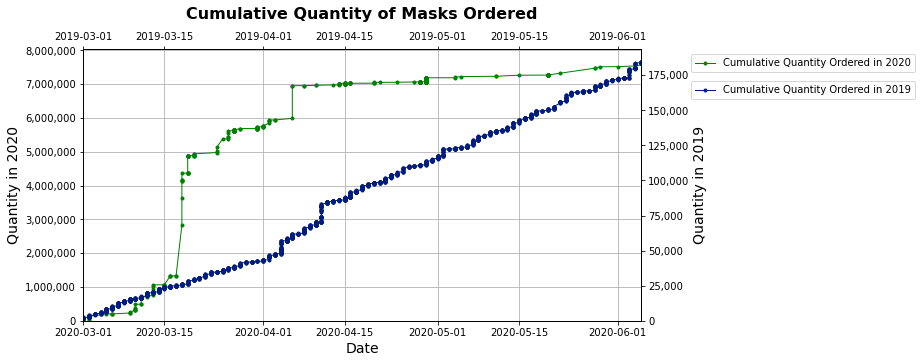

In [89]:
category_df = df.loc[df['VIM_NOUN'] == 'MASK'].copy()
category_df_new = new_df[new_df['Product Category'].str.contains('Mask')].copy()

#settings for plot
plt.style.use('seaborn-dark-palette')
fig,ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
ax2 = ax.twiny()
ax3 = ax2.twinx()

#plotting cumulative percent ordered
category_df = category_df.sort_values(by=['PO_DT'])
result, temp = [], 0
for value in category_df['LUM_QTY']:
    temp += value
    result.append(temp)
category_df['Cumulative Ordered'] = result

category_df_new = category_df_new.sort_values(by = 'Date Ordered')
result, temp = [], 0
for value in category_df_new['QTY Ordered in EA']:
    temp += value
    result.append(temp)  
category_df_new['Cumulative Ordered'] = result

ax3.plot('PO_DT', 'Cumulative Ordered', data=category_df, linewidth=1, label='Cumulative Quantity Ordered in 2019', marker = '.')
ax.plot('Date Ordered', 'Cumulative Ordered', data=category_df_new, linewidth=1, 
        label='Cumulative Quantity Ordered in 2020', color = 'green', marker = '.')

#setting x-axis labels
ax.set_xlabel("Date",fontsize=14)
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 6, 5)])
ax3.set_xlim([datetime.date(2019, 3, 1), datetime.date(2019, 6, 5)])

# setting y-axis labels
ax.set_ylabel("Quantity in 2020", fontsize=14)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylim(ymin=0)
ax3.set_ylabel("Quantity in 2019", fontsize=14)
ax3.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.set_ylim(ymin=0)

#labeling graphs
plt.title('Cumulative Quantity of Masks Ordered', fontsize=16, pad=30, fontweight='bold')
ax.grid(True)
ax.legend(fontsize='medium', bbox_to_anchor=(1.5, 1))
ax3.legend(fontsize='medium', bbox_to_anchor=(1.5, .9))
plt.show()

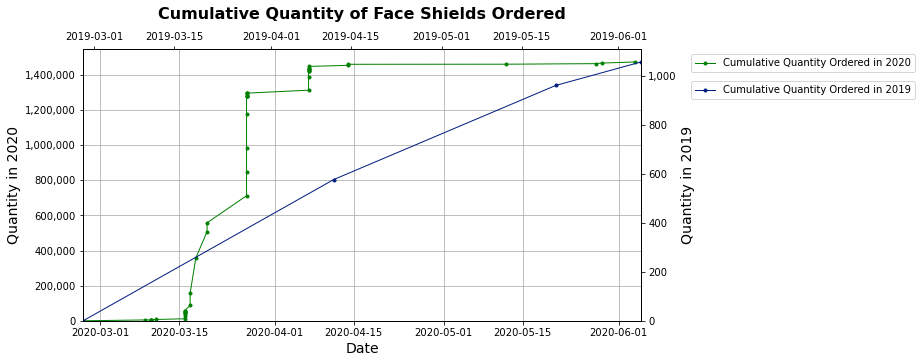

In [90]:
category_df = df.loc[df['VIM_NOUN'] == 'SHIELD'].copy()
row = {'VIM_NOUN': 'SHIELD', 'LUM_QTY': 0,'PO_DT':datetime.date(2019, 2, 27)}
category_df = category_df.append(row, ignore_index=True)

category_df_new = new_df[new_df['Product Category'].str.contains('Shield')].copy()
new_row = {'Product Category':'Shield', 'QTY Ordered in EA':0, 'Date Ordered':datetime.date(2020, 2, 27)}
category_df_new = category_df_new.append(new_row, ignore_index=True)

#settings for plot
plt.style.use('seaborn-dark-palette')
fig,ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
ax2 = ax.twiny()
ax3 = ax2.twinx()

#plotting cumulative percent ordered
category_df = category_df.sort_values(by=['PO_DT'])
result, temp = [], 0
for value in category_df['LUM_QTY']:
    temp += value
    result.append(temp)
category_df['Cumulative Ordered'] = result

category_df_new = category_df_new.sort_values(by = 'Date Ordered')
result, temp = [], 0
for value in category_df_new['QTY Ordered in EA']:
    temp += value
    result.append(temp)
category_df_new['Cumulative Ordered'] = result

ax3.plot('PO_DT', 'Cumulative Ordered', data=category_df, linewidth=1, label='Cumulative Quantity Ordered in 2019', marker = '.')
ax.plot('Date Ordered', 'Cumulative Ordered', data=category_df_new, linewidth=1, 
        label='Cumulative Quantity Ordered in 2020', color = 'green', marker = '.')

#setting x-axis labels
ax.set_xlabel("Date",fontsize=14)
ax.set_xlim([datetime.date(2020, 2, 27), datetime.date(2020, 6, 5)])
ax3.set_xlim([datetime.date(2019, 2, 27), datetime.date(2019, 6, 5)])

# setting y-axis labels
ax.set_ylabel("Quantity in 2020", fontsize=14)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylim(ymin=0)
ax3.set_ylabel("Quantity in 2019", fontsize=14)
ax3.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.set_ylim(ymin=0)

#labeling graphs
plt.title('Cumulative Quantity of Face Shields Ordered', fontsize=16, pad=30, fontweight='bold')
ax.grid(True)
ax.legend(fontsize='medium', bbox_to_anchor=(1.5, 1))
ax3.legend(fontsize='medium', bbox_to_anchor=(1.5, .9))
plt.show()

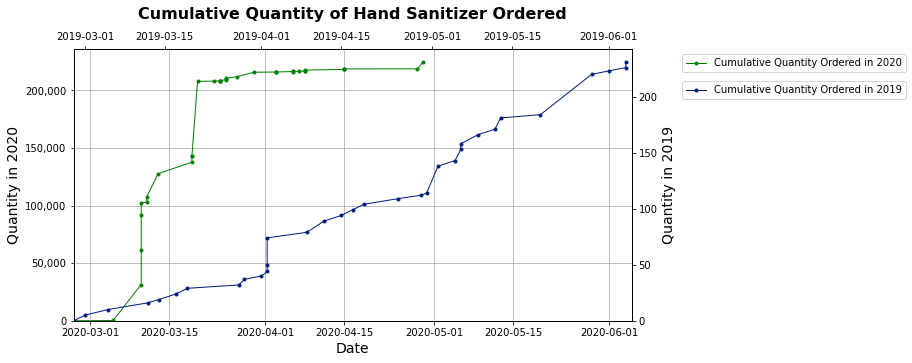

In [91]:
category_df = df.loc[df['VIM_NOUN'] == 'SANITIZER'].copy()
row = {'VIM_NOUN': 'SANITIZER', 'LUM_QTY': 0,'PO_DT':datetime.date(2019, 2, 27)}
category_df = category_df.append(row, ignore_index=True)

category_df_new = new_df[new_df['Product Category'].str.contains('Sanitizer')].copy()
new_row = {'Product Category':'Sanitizer', 'QTY Ordered in EA':0, 'Date Ordered':datetime.date(2020, 2, 27)}
category_df_new = category_df_new.append(new_row, ignore_index=True)

#settings for plot
plt.style.use('seaborn-dark-palette')
fig,ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
ax2 = ax.twiny()
ax3 = ax2.twinx()

#plotting cumulative percent ordered
category_df = category_df.sort_values(by=['PO_DT'])
result, temp = [], 0
for value in category_df['LUM_QTY']:
    temp += value
    result.append(temp)
category_df['Cumulative Ordered'] = result

category_df_new = category_df_new.sort_values(by = 'Date Ordered')
result, temp = [], 0
for value in category_df_new['QTY Ordered in EA']:
    temp += value
    result.append(temp) 
category_df_new['Cumulative Ordered'] = result

ax3.plot('PO_DT', 'Cumulative Ordered', data=category_df, linewidth=1, label='Cumulative Quantity Ordered in 2019', marker = '.')
ax.plot('Date Ordered', 'Cumulative Ordered', data=category_df_new, linewidth=1, label='Cumulative Quantity Ordered in 2020', color = 'green', marker = '.')

#setting x-axis labels
ax.set_xlabel("Date",fontsize=14)
ax.set_xlim([datetime.date(2020, 2, 27), datetime.date(2020, 6, 5)])
ax3.set_xlim([datetime.date(2019, 2, 27), datetime.date(2019, 6, 5)])

# setting y-axis labels
ax.set_ylabel("Quantity in 2020", fontsize=14)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylim(ymin=0)
ax3.set_ylabel("Quantity in 2019", fontsize=14)
ax3.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.set_ylim(ymin=0)

#labeling graphs
plt.title('Cumulative Quantity of Hand Sanitizer Ordered', fontsize=16, pad=30, fontweight='bold')
ax.grid(True)
ax.legend(fontsize='medium', bbox_to_anchor=(1.5, 1))
ax3.legend(fontsize='medium', bbox_to_anchor=(1.5, .9))
plt.show()

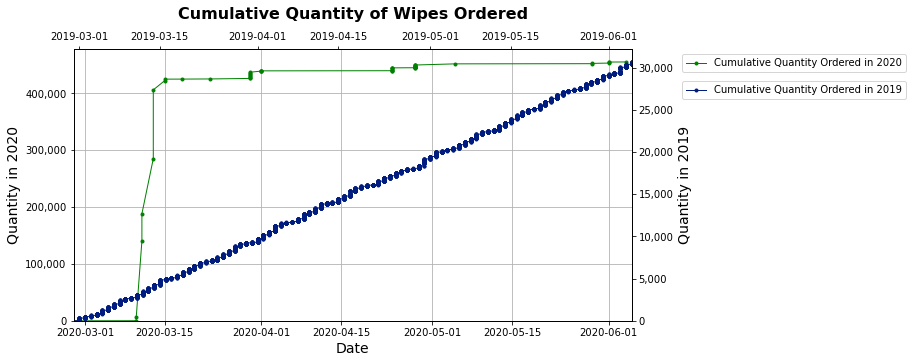

In [92]:
category_df = df.loc[df['VIM_NOUN'] == 'WIPE'].copy()
row = {'VIM_NOUN': 'WIPE', 'LUM_QTY': 0,'PO_DT':datetime.date(2019, 2, 27)}
category_df = category_df.append(row, ignore_index=True)

category_df_new = new_df[new_df['Product Category'].str.contains('Wipes')].copy()
new_row = {'Product Category':'Wipes', 'QTY Ordered in EA':0, 'Date Ordered':datetime.date(2020, 2, 27)}
category_df_new = category_df_new.append(new_row, ignore_index=True)

#settings for plot
plt.style.use('seaborn-dark-palette')
fig,ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
ax2 = ax.twiny()
ax3 = ax2.twinx()

#plotting cumulative percent ordered
category_df = category_df.sort_values(by=['PO_DT'])
result, temp = [], 0
for value in category_df['LUM_QTY']:
    temp += value
    result.append(temp)
category_df['Cumulative Ordered'] = result

category_df_new = category_df_new.sort_values(by = 'Date Ordered')
result, temp = [], 0
for value in category_df_new['QTY Ordered in EA']:
    temp += value
    result.append(temp)
category_df_new['Cumulative Ordered'] = result

ax3.plot('PO_DT', 'Cumulative Ordered', data=category_df, linewidth=1, label='Cumulative Quantity Ordered in 2019', marker = '.')
ax.plot('Date Ordered', 'Cumulative Ordered', data=category_df_new, linewidth=1, label='Cumulative Quantity Ordered in 2020', color = 'green', marker = '.')

#setting x-axis labels
ax.set_xlabel("Date",fontsize=14)
ax.set_xlim([datetime.date(2020, 2, 28), datetime.date(2020, 6, 5)])
ax3.set_xlim([datetime.date(2019, 2, 28), datetime.date(2019, 6, 5)])

# setting y-axis labels
ax.set_ylabel("Quantity in 2020", fontsize=14)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylim(ymin=0)
ax3.set_ylabel("Quantity in 2019", fontsize=14)
ax3.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.set_ylim(ymin=0)

#labeling graphs
plt.title('Cumulative Quantity of Wipes Ordered', fontsize=16, pad=30, fontweight='bold')
ax.grid(True)
ax.legend(fontsize='medium', bbox_to_anchor=(1.5, 1))
ax3.legend(fontsize='medium', bbox_to_anchor=(1.5, .9))
plt.show()